# House Price Prediction 

![Image of Yaktocat](https://cdn.vox-cdn.com/thumbor/K7Z0o3QWFprb0QBIz8FsHQ3ZzeI=/0x0:3000x2000/1200x675/filters:focal(1260x760:1740x1240)/cdn.vox-cdn.com/uploads/chorus_image/image/63658291/shutterstock_89808568.0.jpg)

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


# Data collection and cleaning

About the datasets:


I following data from  https://fred.stlouisfed.org/ to compile my dataset:-

- 30-Year Fixed Rate Mortgage Average in the United States	        (Mortgage_rate)
Percent, Weekly: Year 2000 - 2022
 
- Employment Rate: Aged 15-64: All Persons for the United States	(employment_rate)
Percent, Monthly: Year 2000 - 2022
 
- Gross Domestic Product	                                         (gdp)
Millions of Dollars, Quarterly: Year 2000 - 2022
 
- Housing Inventory Estimate: Total Housing Units in the United States	 (house_inventory_estimate)
Thousands of Units, Quarterly: Year 2000 - 2022
 
- New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units	(permit_units	)
Thousands of Units, Monthly: Year 2000 - 2022
 
- Personal Income	                                                                  (PI	)
Billions of Dollars, Monthly: Year 2000 - 2022
 
- Population	                                                   (population)
Thousands, Monthly: Year 2000 - 2022
 
- Producer Price Index by Commodity: Special Indexes: Construction Materials	 (ppi_construction)
Index 1982=100, Monthly: Year 2000 - 2022
 
- S&P/Case-Shiller U.S. National Home Price Index	            (House_price_index)
Index Jan 2000=100, Monthly: Year 2000 - 2022

In [2]:
d1=pd.read_excel('monthly_data.xlsx')
d2=pd.read_excel('quarterly_data.xlsx')
d3=pd.read_csv('m1.csv')

In [3]:
d1.head()

,DATE,employment_rate,permit_units,PI,population,ppi_construction,House_price_index
0,2000-01-01,74.264011,1727,8382.6,281083,144.1,100.000
1,2000-02-01,74.283318,1692,8443.7,281299,144.7,100.571
2,2000-03-01,74.243151,1651,8503.7,281531,145.4,101.466
3,2000-04-01,74.509084,1597,8542.9,281763,145.6,102.541
4,2000-05-01,74.079187,1543,8580.9,281996,144.9,103.702


In [4]:
d2

,DATE,house_inventory_estimate,gdp
0,2000-01-01,NaN,2449139
1,2000-04-01,116047.0,2569476
2,2000-07-01,116482.0,2578060
3,2000-10-01,116914.0,2655679
4,2001-01-01,117347.0,2562436
...,...,...,...
86,2021-07-01,142265.0,5883177
87,2021-10-01,142602.0,6203369
88,2022-01-01,142939.0,6010733
89,2022-04-01,143276.0,6352982


In [5]:
d3.head()

,DATE,Mortgage_rate
0,2000-01-01,8.2100000000000000
1,2000-02-01,8.3250000000000000
2,2000-03-01,8.2400000000000000
3,2000-04-01,8.1525000000000000
4,2000-05-01,8.5150000000000000


In [6]:
d1.DATE = pd.to_datetime(d1.DATE)
d2.DATE = pd.to_datetime(d2.DATE)
d3.DATE = pd.to_datetime(d3.DATE)

In [7]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           277 non-null    datetime64[ns]
 1   Mortgage_rate  277 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 4.5+ KB


In [8]:
df1=d1.merge(d3,how='left',on='DATE')

In [9]:
df1['Year'] = df1.DATE.dt.year
df1['Month'] = df1.DATE.dt.month

In [10]:
d2['Year'] = d2.DATE.dt.year
d2['Month'] = d2.DATE.dt.month

In [11]:
def function(x):
    if x < 4:
        return 1
    elif x<7:
        return 2
    elif x<10:
        return 3
    else:
        return 4

In [12]:
df1['quarter']=df1['Month'].apply(function)

In [13]:
d2['quarter']=d2['Month'].apply(function)

In [14]:
d2

,DATE,house_inventory_estimate,gdp,Year,Month,quarter
0,2000-01-01,NaN,2449139,2000,1,1
1,2000-04-01,116047.0,2569476,2000,4,2
2,2000-07-01,116482.0,2578060,2000,7,3
3,2000-10-01,116914.0,2655679,2000,10,4
4,2001-01-01,117347.0,2562436,2001,1,1
...,...,...,...,...,...,...
86,2021-07-01,142265.0,5883177,2021,7,3
87,2021-10-01,142602.0,6203369,2021,10,4
88,2022-01-01,142939.0,6010733,2022,1,1
89,2022-04-01,143276.0,6352982,2022,4,2


In [15]:
df1=df1.merge(d2[["house_inventory_estimate","gdp",'Year','quarter']],how='left',on=['Year','quarter'])

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 274
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE                      275 non-null    datetime64[ns]
 1   employment_rate           275 non-null    float64       
 2   permit_units              275 non-null    int64         
 3   PI                        275 non-null    float64       
 4   population                275 non-null    int64         
 5   ppi_construction          275 non-null    float64       
 6   House_price_index         274 non-null    float64       
 7   Mortgage_rate             275 non-null    object        
 8   Year                      275 non-null    int64         
 9   Month                     275 non-null    int64         
 10  quarter                   275 non-null    int64         
 11  house_inventory_estimate  270 non-null    float64       
 12  gdp                   

In [17]:
df1

,DATE,employment_rate,permit_units,PI,population,ppi_construction,House_price_index,Mortgage_rate,Year,Month,quarter,house_inventory_estimate,gdp
0,2000-01-01,74.264011,1727,8382.6,281083,144.100,100.000,8.2100000000000000,2000,1,1,NaN,2449139.0
1,2000-02-01,74.283318,1692,8443.7,281299,144.700,100.571,8.3250000000000000,2000,2,1,NaN,2449139.0
2,2000-03-01,74.243151,1651,8503.7,281531,145.400,101.466,8.2400000000000000,2000,3,1,NaN,2449139.0
3,2000-04-01,74.509084,1597,8542.9,281763,145.600,102.541,8.1525000000000000,2000,4,2,116047.0,2569476.0
4,2000-05-01,74.079187,1543,8580.9,281996,144.900,103.702,8.5150000000000000,2000,5,2,116047.0,2569476.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2022-07-01,71.295724,1685,21781.7,333137,346.790,307.177,5.4125000000000000,2022,7,3,143613.0,6439154.0
271,2022-08-01,71.452735,1542,21859.9,333240,342.746,303.706,5.2225000000000000,2022,8,3,143613.0,6439154.0
272,2022-09-01,71.415296,1564,21942.6,333347,336.421,300.588,6.1120000000000000,2022,9,3,143613.0,6439154.0
273,2022-10-01,71.208672,1512,22092.0,333457,333.333,298.990,6.9000000000000000,2022,10,4,NaN,NaN


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 274
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE                      275 non-null    datetime64[ns]
 1   employment_rate           275 non-null    float64       
 2   permit_units              275 non-null    int64         
 3   PI                        275 non-null    float64       
 4   population                275 non-null    int64         
 5   ppi_construction          275 non-null    float64       
 6   House_price_index         274 non-null    float64       
 7   Mortgage_rate             275 non-null    object        
 8   Year                      275 non-null    int64         
 9   Month                     275 non-null    int64         
 10  quarter                   275 non-null    int64         
 11  house_inventory_estimate  270 non-null    float64       
 12  gdp                   

In [19]:
df1['Mortgage_rate']=df1['Mortgage_rate'].astype(float)

In [20]:
df1.columns

Index(['DATE', 'employment_rate', 'permit_units', 'PI', 'population',
       'ppi_construction', 'House_price_index', 'Mortgage_rate', 'Year',
       'Month', 'quarter', 'house_inventory_estimate', 'gdp'],
      dtype='object')

In [21]:
df=df1.dropna()


In [22]:
df

,DATE,employment_rate,permit_units,PI,population,ppi_construction,House_price_index,Mortgage_rate,Year,Month,quarter,house_inventory_estimate,gdp
3,2000-04-01,74.509084,1597,8542.9,281763,145.600,102.541,8.1525,2000,4,2,116047.0,2569476.0
4,2000-05-01,74.079187,1543,8580.9,281996,144.900,103.702,8.5150,2000,5,2,116047.0,2569476.0
5,2000-06-01,74.212281,1572,8634.2,282247,145.000,104.855,8.2880,2000,6,2,116047.0,2569476.0
6,2000-07-01,73.825749,1542,8701.2,282504,144.400,105.722,8.1475,2000,7,3,116482.0,2578060.0
7,2000-08-01,73.875723,1552,8747.4,282769,143.700,106.522,8.0275,2000,8,3,116482.0,2578060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2022-05-01,71.378397,1695,21573.6,332928,353.015,306.586,5.2300,2022,5,2,143276.0,6352982.0
269,2022-06-01,71.240100,1696,21687.0,333028,349.800,308.371,5.5220,2022,6,2,143276.0,6352982.0
270,2022-07-01,71.295724,1685,21781.7,333137,346.790,307.177,5.4125,2022,7,3,143613.0,6439154.0
271,2022-08-01,71.452735,1542,21859.9,333240,342.746,303.706,5.2225,2022,8,3,143613.0,6439154.0


In [51]:
df.to_csv('final_data.csv',index=False)

# Exploratory Data Analysis & Preprocessing

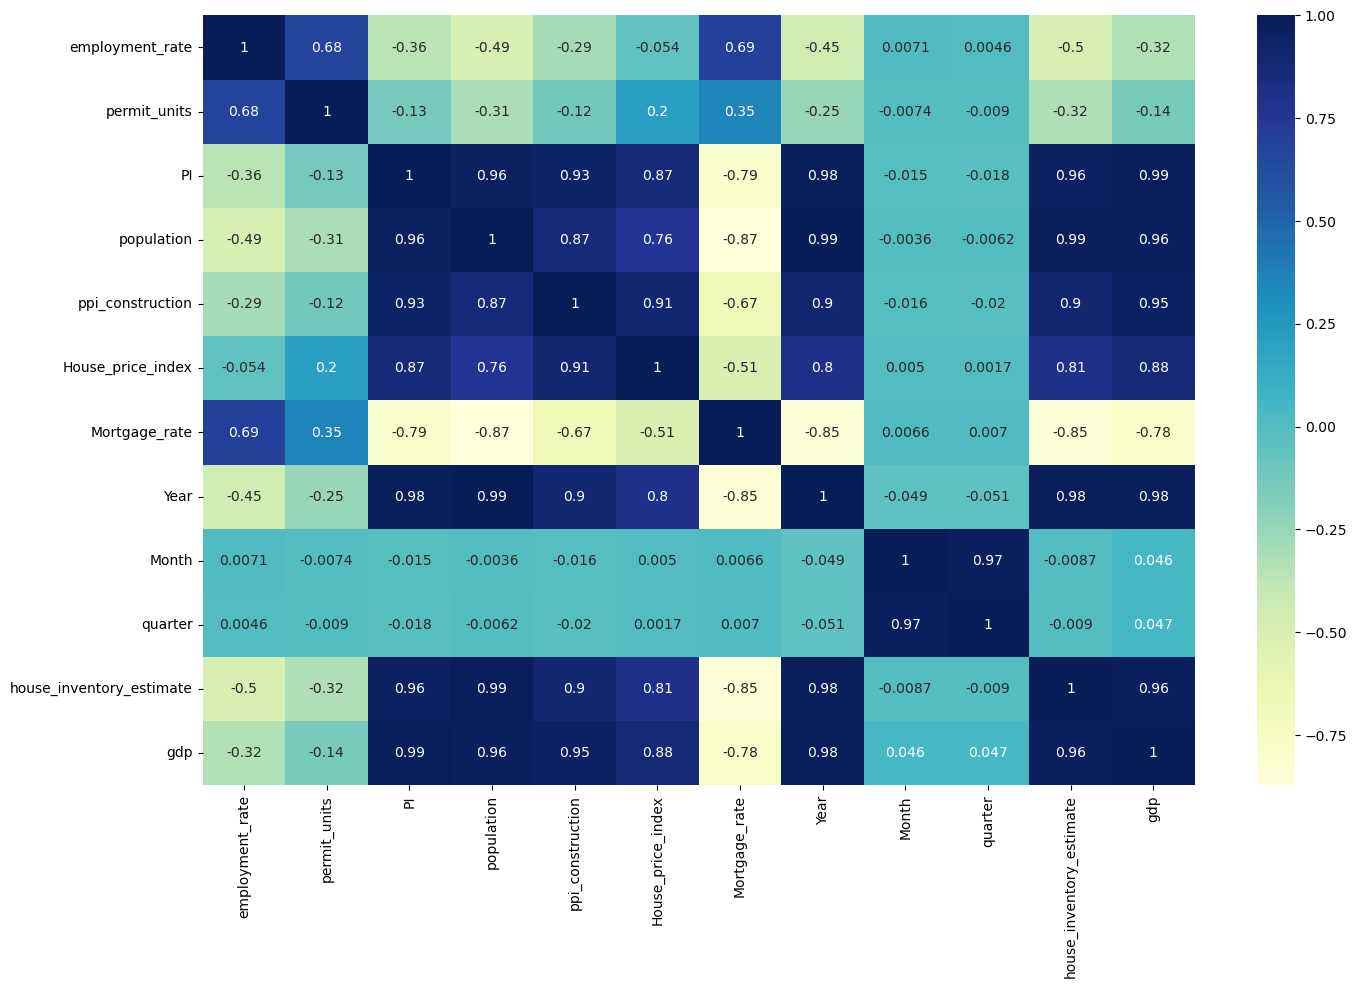

In [24]:
plt.figure(figsize = (16,10))
dataplot = sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

We can observe that-
- home price index has strong positive correlation with Personal Income, Population, Year, House inventory estimate, gdp

In [25]:
df.describe()

,employment_rate,permit_units,PI,population,ppi_construction,House_price_index,Mortgage_rate,Year,Month,quarter,house_inventory_estimate,gdp
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,2.700000e+02
mean,69.896453,1349.788889,13962.607037,311003.751852,203.077363,171.298119,4.955491,2011.000000,6.500000,2.500000,131325.533333,4.070506e+06
std,2.259398,466.608761,3772.312744,15916.972553,45.873367,42.678001,1.319555,6.515067,3.429318,1.110109,7372.461331,9.959213e+05
min,60.254667,513.000000,8542.900000,281763.000000,141.700000,102.541000,2.684000,2000.000000,1.000000,1.000000,116047.000000,2.562436e+06
25%,67.936006,1010.500000,10884.175000,297144.500000,172.900000,143.140250,3.891250,2005.000000,4.000000,2.000000,126104.000000,3.333266e+06
50%,70.576191,1332.000000,13360.950000,312259.500000,202.650000,166.587500,4.725750,2011.000000,6.500000,2.500000,132300.500000,3.912449e+06
75%,71.563209,1695.000000,16540.450000,326012.750000,218.425000,184.935500,6.067250,2017.000000,9.000000,3.000000,136818.000000,4.811649e+06
max,74.509084,2263.000000,24371.900000,333347.000000,353.015000,308.371000,8.515000,2022.000000,12.000000,4.000000,143613.000000,6.439154e+06


<Figure size 2000x2000 with 0 Axes>

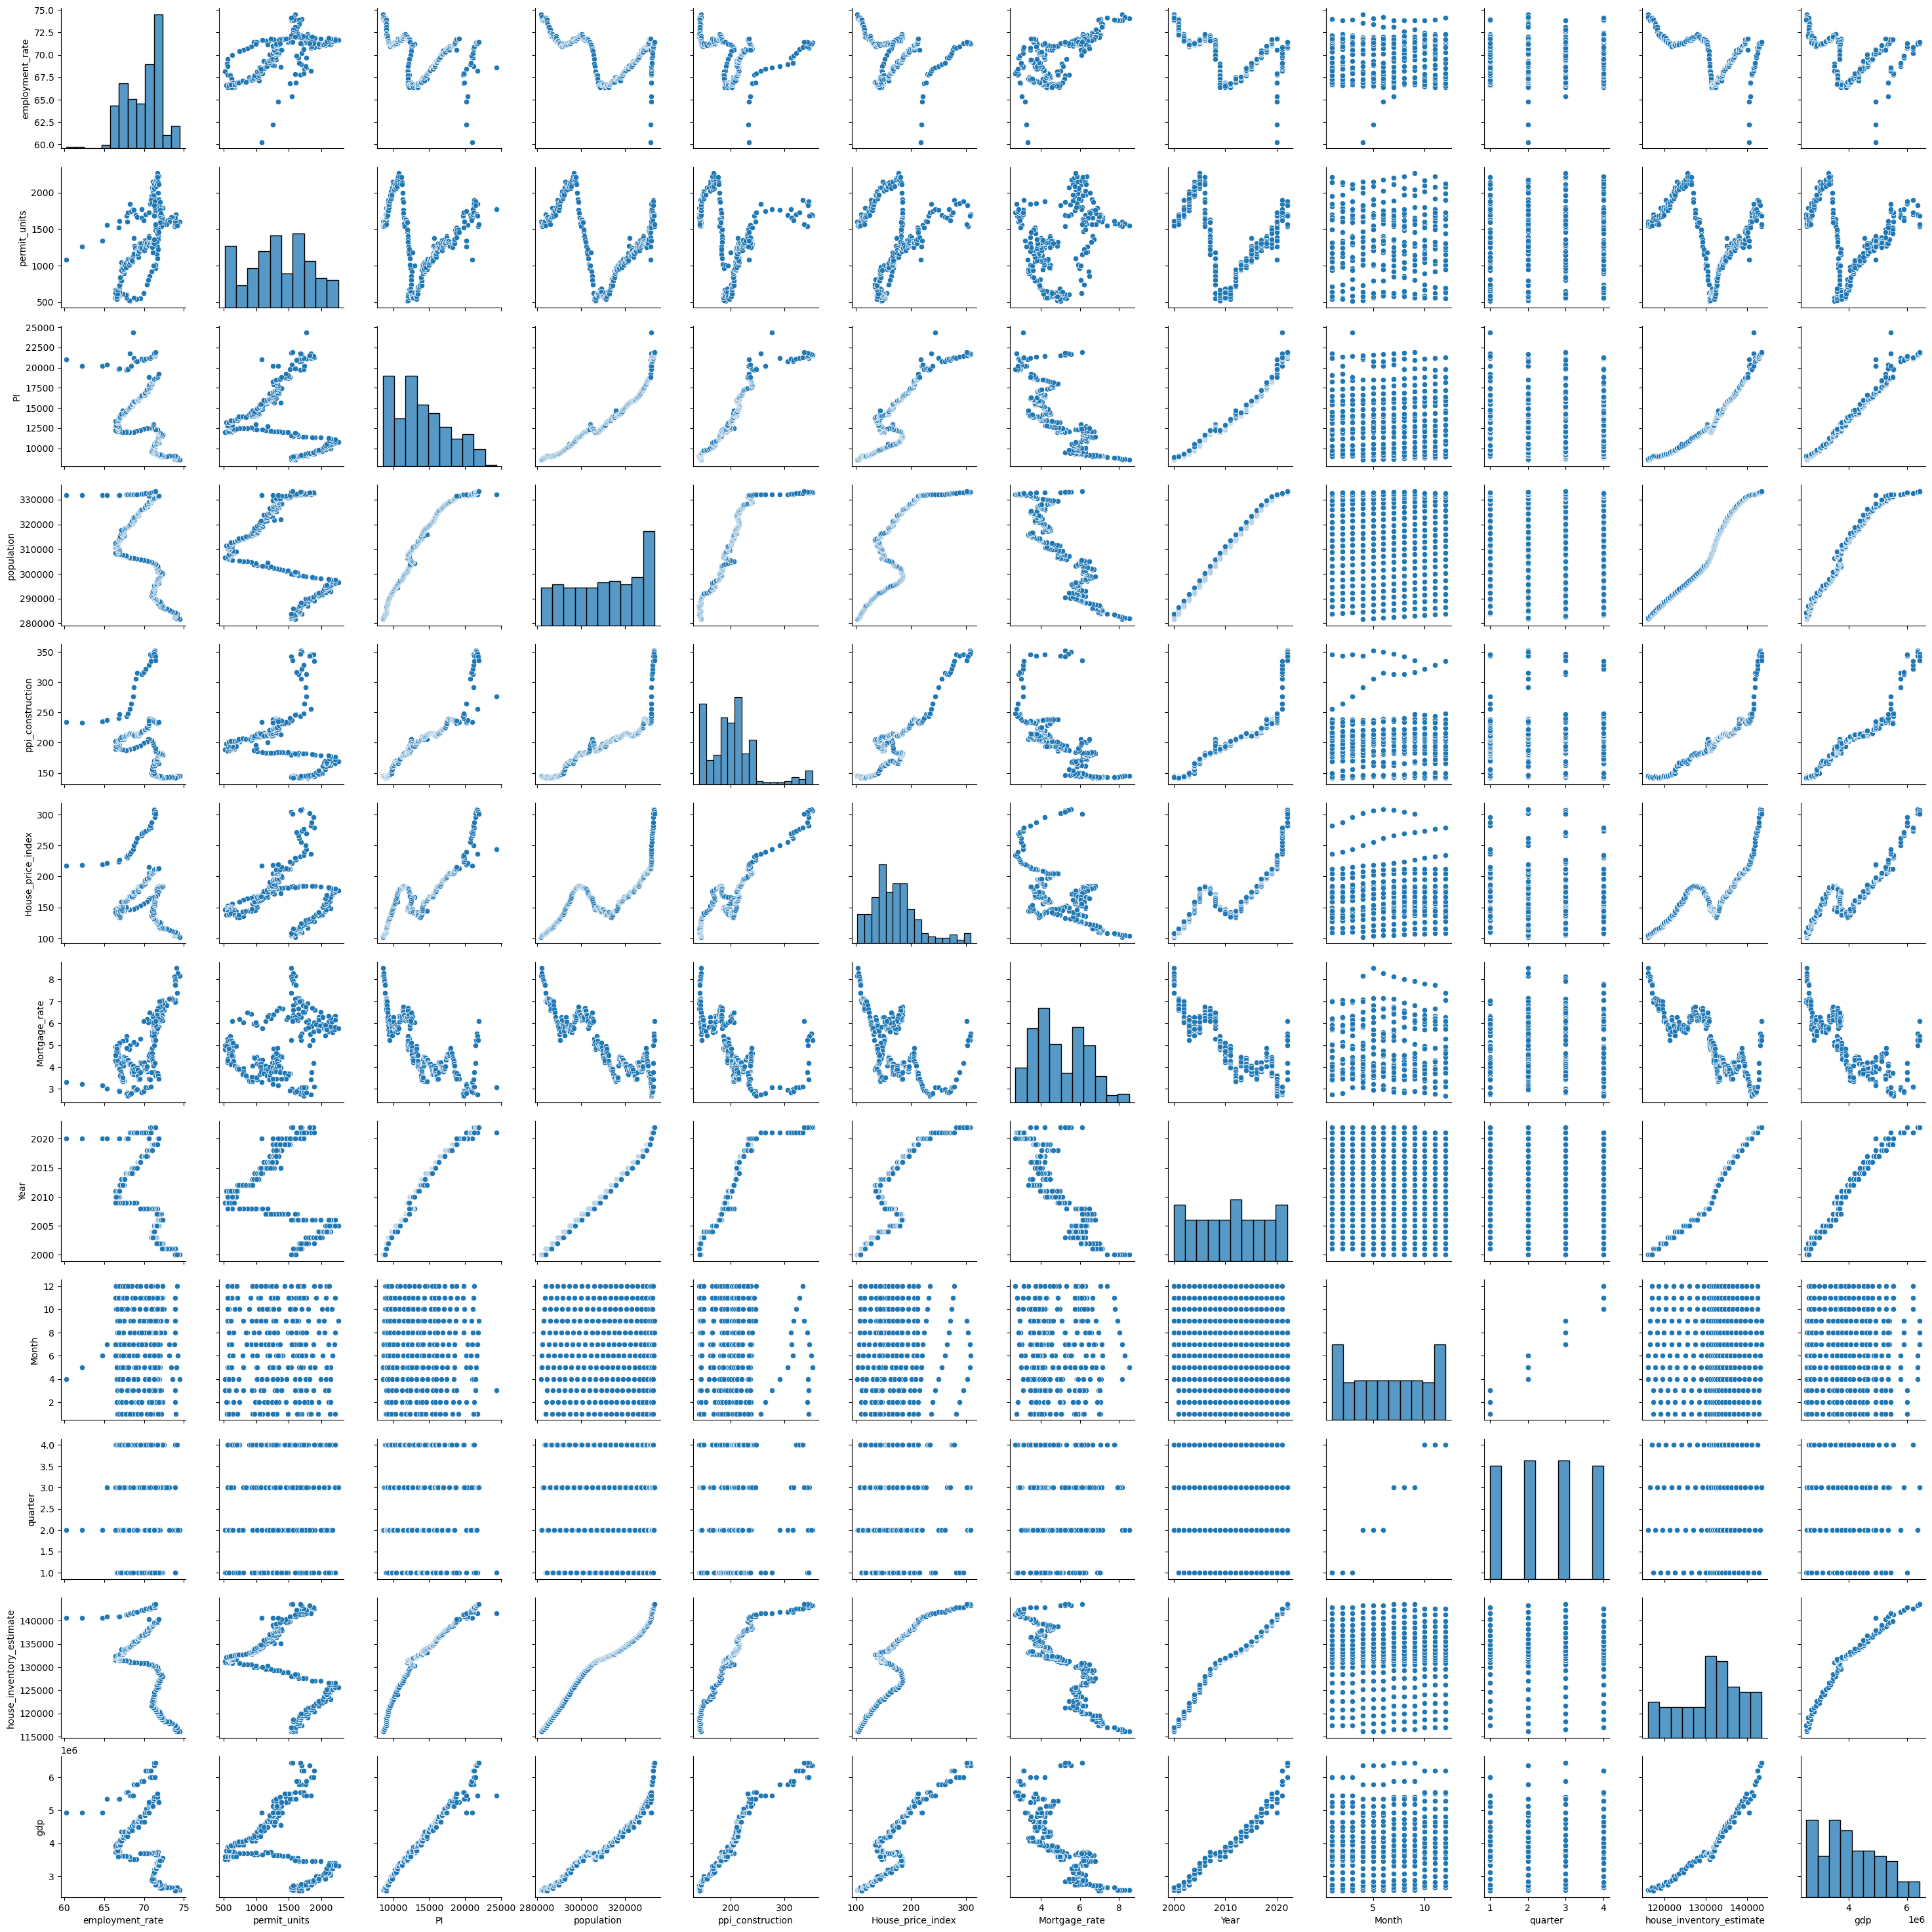

In [26]:
plt.figure(figsize = (20,20))
sns.pairplot(df)

In [27]:
df.columns

Index(['DATE', 'employment_rate', 'permit_units', 'PI', 'population',
       'ppi_construction', 'House_price_index', 'Mortgage_rate', 'Year',
       'Month', 'quarter', 'house_inventory_estimate', 'gdp'],
      dtype='object')

In [28]:
X=df[['employment_rate', 'permit_units', 'PI', 'population',
       'ppi_construction',  'Mortgage_rate', 'Year',
        'house_inventory_estimate', 'gdp']]

In [29]:
X

,employment_rate,permit_units,PI,population,ppi_construction,Mortgage_rate,Year,house_inventory_estimate,gdp
3,74.509084,1597,8542.9,281763,145.600,8.1525,2000,116047.0,2569476.0
4,74.079187,1543,8580.9,281996,144.900,8.5150,2000,116047.0,2569476.0
5,74.212281,1572,8634.2,282247,145.000,8.2880,2000,116047.0,2569476.0
6,73.825749,1542,8701.2,282504,144.400,8.1475,2000,116482.0,2578060.0
7,73.875723,1552,8747.4,282769,143.700,8.0275,2000,116482.0,2578060.0
...,...,...,...,...,...,...,...,...,...
268,71.378397,1695,21573.6,332928,353.015,5.2300,2022,143276.0,6352982.0
269,71.240100,1696,21687.0,333028,349.800,5.5220,2022,143276.0,6352982.0
270,71.295724,1685,21781.7,333137,346.790,5.4125,2022,143613.0,6439154.0
271,71.452735,1542,21859.9,333240,342.746,5.2225,2022,143613.0,6439154.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 3 to 272
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE                      270 non-null    datetime64[ns]
 1   employment_rate           270 non-null    float64       
 2   permit_units              270 non-null    int64         
 3   PI                        270 non-null    float64       
 4   population                270 non-null    int64         
 5   ppi_construction          270 non-null    float64       
 6   House_price_index         270 non-null    float64       
 7   Mortgage_rate             270 non-null    float64       
 8   Year                      270 non-null    int64         
 9   Month                     270 non-null    int64         
 10  quarter                   270 non-null    int64         
 11  house_inventory_estimate  270 non-null    float64       
 12  gdp                   

In [31]:
y=df['House_price_index'].values

## Train test split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_val, y_train, y_val = train_test_split( X,y, test_size=0.3,shuffle=False) 

#  Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [35]:
scaler = MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform((X_val))

In [36]:
X_train_scaled

array([[1.        , 0.61942857, 0.        , ..., 0.        , 0.        ,
        0.00336475],
       [0.94718556, 0.58857143, 0.00517514, ..., 0.        , 0.        ,
        0.00336475],
       [0.96353656, 0.60514286, 0.01243395, ..., 0.        , 0.        ,
        0.00336475],
       ...,
       [0.28909699, 0.36971429, 0.99137931, ..., 1.        , 1.        ,
        1.        ],
       [0.30743609, 0.41771429, 0.99255053, ..., 1.        , 1.        ,
        1.        ],
       [0.33331638, 0.39885714, 1.        , ..., 1.        , 1.        ,
        1.        ]])

# Training

In [37]:
from sklearn.linear_model  import LinearRegression ,BayesianRidge,ElasticNet,Lasso,Ridge,RidgeCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [38]:
def train_and_evaluate(model,X_train,y_train, X_val,y_val):
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=True)
    val_rmse = mean_squared_error(model.predict(X_val), y_val,squared=True)
    mape= mean_absolute_percentage_error( y_val,model.predict(X_val))
    return model, train_rmse, val_rmse,mape

In [39]:
models=[LinearRegression() ,BayesianRidge(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),XGBRegressor( ),XGBRFRegressor(),CatBoostRegressor(verbose=False),LGBMRegressor()]

In [40]:
Model_name=[]
Train_rmse=[]
Val_rmse=[]
MAPE=[]
for model in models:
    model, train_rmse, val_rmse,mape = train_and_evaluate(model,X_train_scaled,y_train, X_val_scaled,y_val)
    Model_name.append(str(model))
    Train_rmse.append(train_rmse)
    Val_rmse.append( val_rmse)
    MAPE.append(mape)
    
    

In [41]:
dict={'Model': Model_name, 'train_rmse': Train_rmse, 'val_rmse': Val_rmse,'mape': MAPE} 

In [42]:
eval=pd.DataFrame(dict)

## Evaluation

In [43]:
eval

,Model,train_rmse,val_rmse,mape
0,LinearRegression(),7.994443,1844.941024,0.103038
1,BayesianRidge(),7.997524,1769.236828,0.100969
2,Lasso(),191.856240,2186.930246,0.152289
3,Ridge(),61.442976,162.376360,0.038509
4,ElasticNet(),376.753530,4171.312077,0.236640
5,SVR(),69.512492,6014.794896,0.272439
6,DecisionTreeRegressor(),0.000000,3571.251186,0.188990
7,RandomForestRegressor(),0.428018,3731.916437,0.197489
8,AdaBoostRegressor(),8.520864,4023.850457,0.211639
9,"XGBRegressor(base_score=None, booster=None, ca...",0.000206,3819.889639,0.200644


In [44]:
train_and_evaluate(Ridge(),X_train_scaled,y_train, X_val_scaled,y_val)

(Ridge(), 61.44297605056411, 162.37635968011648, 0.03850917255822475)

### Lets train its hyper parameters to make it better

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

In [47]:
parameters = {'alpha':np.linspace(0.1,10,num=100),'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],'positive':[1,0]}
clf = GridSearchCV(Ridge(), parameters,scoring='neg_mean_squared_error')

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'alpha': 0.1, 'positive': 0, 'solver': 'svd'}
-25.388615271352144


In [48]:
train_and_evaluate(Ridge(alpha= 0.1, positive= 0, solver= 'svd'),X_train_scaled,y_train, X_val_scaled,y_val)

(Ridge(alpha=0.1, positive=0, solver='svd'),
 11.539149507338031,
 795.4568310806943,
 0.07058756660775113)

###  Using  Gridsearchcv did not improve the results ,even though our train rmse decreased, validation rmse has increased.
  So we will stick to the base model .
  

In [49]:
# pip install yellowbrick

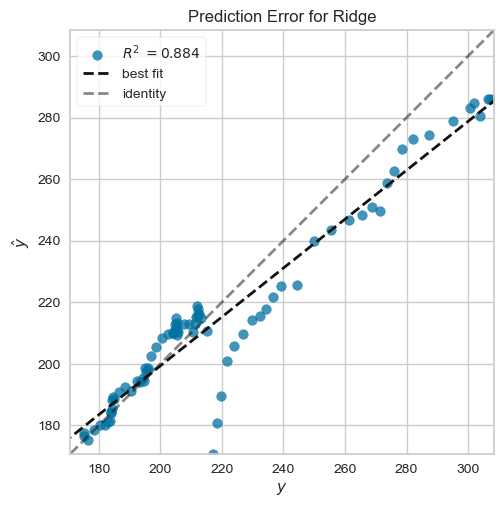

In [50]:

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import prediction_error


model = Ridge()
visualizer = prediction_error(model, X_train_scaled, y_train, X_val_scaled, y_val)

#### As we can see that Ridge model gave best results(lowest rmse & MAPE) :
- Train rmse= 61.44,
- Validation rmse= 162.376,
- Mean absolute percentage error= 3.8%